In [ ]:
!pip install git+https://github.com/pymc-devs/pymc3
!pip install git+git://github.com/arviz-devs/arviz.git

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import pymc3 as pm
import arviz as az
from scipy import stats
pd.set_option('display.max_columns', 500)
import warnings
from scipy.stats import spearmanr
import sys
warnings.filterwarnings("ignore")

import logging
logger = logging.getLogger('pymc3')
logger.setLevel(logging.CRITICAL)

%matplotlib inline

In [3]:
sys.path.append("/Users/ailin/Documents/grid-dynamics/DS/data_cleaning/")

In [4]:
from data_preparation import prepare_triplogs, prepare_tripdatas, get_clean_triplogs, get_clean_tripdatas

In [5]:
!ls ../../../trips/2020_11_8_to_2020_11_14/CVP/triplogs.csv

../../../trips/2020_11_8_to_2020_11_14/CVP/triplogs.csv


In [6]:
%%time
triplogs = pd.read_csv('../../../trips/2020_11_8_to_2020_11_14/CVP/triplogs.csv')
tripdatas = pd.read_csv('../../../trips/2020_11_8_to_2020_11_14/CVP/tripdatas.csv')

triplogs = prepare_triplogs(triplogs)
tripdatas = prepare_tripdatas(tripdatas)

# takes about 10 minutes to run

tripdatas = get_clean_tripdatas(tripdatas) # cleaning tripdatas first is important
tripdatas_df_good = tripdatas[tripdatas["is_good_for_study"]] # remove messy tripdatas now so it doesnt affect triplogs cleaning
triplogs = get_clean_triplogs(triplogs, tripdatas_df_good)
triplogs_clean = triplogs[triplogs["is_good_for_study"]]

# from collections import defaultdict
# triplogs = prepare_triplogs(triplogs)
# tripdatas = prepare_tripdatas(tripdatas)

# # takes about 2 minutes to run
# triplogs_clean = get_clean_triplogs(triplogs, tripdatas)#, defaultdict(lambda: False))
# # triplogs_clean = triplogs_clean[triplogs_clean['is_good_for_study']]

drop invalid
drop starttime >= endtime
drop endstatus not completed
drop normal tspmode
drop negative duration
drop <=70% stops hit
drop <=70% breadcrumbs
drop duplicated rows
drop tspon no tsp requests
drop 3 stds anomalies
CPU times: user 8min 30s, sys: 4min 31s, total: 13min 2s
Wall time: 15min 29s


In [7]:
triplogs_clean.head()

,__v,_id,countearly,countlate,countontime,countstopshit,counttsprequests,deviceid,direction,duration,earlylimit,endreason,endstatus,endtime,headsign,headway,latelimit,logid,routename,routepriority,starttime,stops,syncedtocms,totaldwell,totaltravel,tripid,triptype,tspmode,tzoffset,uploaddate,utcoffset,valid,vehiclename,verasmapp,verasmserver,date_ran,starthour,uid,reason_not_good_for_study,is_good_for_study
1,0,{oid=5fb3380ffc9b903c16c4c186},50,0,41,91,0,4010KK1199,inbound,4071.034,1,NaN,completed,2020-11-09 22:49:50.589,Bayview District,10,4,20201109-t6,54,0,2020-11-09 21:41:59.555,92,False,1322,2662,9478132,schedule,alwaysOff,-800,2020-11-17 02:40:15.622,-480,True,NF8808,1.8.1,1.8.1,2020-11-09,21,4010KK1199_20201109-t6,,True
3,0,{oid=5fa9f25780ad8ba417a8a80d},34,0,18,52,17,4010KJ1133,outbound,4245.127,1,NaN,completed,2020-11-09 19:19:10.958,City College,10,4,20201109-t2,8,0,2020-11-09 18:08:25.831,54,False,1016,3180,9546907,schedule,alwaysOn,-800,2020-11-10 01:52:23.539,-480,True,NF6585,1.8.1,1.8.1,2020-11-09,18,4010KJ1133_20201109-t2,,True
4,0,{oid=5fad7017348d72d81723ed38},34,1,27,62,0,4010KA0950,outbound,3933.813,1,NaN,completed,2020-11-09 18:20:25.396,Munich + Geneva,10,4,20201109-t2,43,0,2020-11-09 17:14:51.583,68,False,566,3330,9548191,schedule,alwaysOff,-800,2020-11-12 17:25:43.752,-480,True,NF8913,1.8.1,1.8.1,2020-11-09,17,4010KA0950_20201109-t2,,True
5,0,{oid=5fad91b463570cb8177fc37d},53,0,14,67,0,4010KA0950,inbound,3322.579,1,NaN,completed,2020-11-09 21:38:56.252,Masonic + Geary,10,4,20201109-t5,43,0,2020-11-09 20:43:33.673,69,False,447,2230,9548291,schedule,alwaysOff,-800,2020-11-12 19:49:08.533,-480,True,NF8913,1.8.1,1.8.1,2020-11-09,20,4010KA0950_20201109-t5,,True
14,0,{oid=5fab5af16e3fbb64176f40ee},86,0,4,90,3,4010KN2010,inbound,3777.660,1,NaN,completed,2020-11-09 21:44:43.162,Bayview District,10,4,20201109-t5,54,0,2020-11-09 20:41:45.502,92,False,590,3126,9478129,schedule,alwaysOn,-800,2020-11-11 03:30:57.385,-480,True,NF8622,1.8.1,1.8.1,2020-11-09,20,4010KN2010_20201109-t5,,True


In [8]:
tripdatas.head()

,__v,_id,deviceid,dir,distance,dwelltime,emitterid,event,headway,loc,logid,mph,routename,stopindex,stopname,time,tracktime,traveltime,unloc,date_ran,uid,reason_not_good_for_study,is_good_for_study
0,0,{oid=5faa4124348d72d817d58d65},4010KO2063,170.3,NaN,NaN,NaN,GPS,NaN,"{coordinates=[-122.450408333333, 37.7678033333...",20201108-t4,29.575046,NBUS,NaN,NaN,2020-11-08 19:05:12.865,NaN,NaN,"{coordinates=[0, 0], type=Point}",2020-11-08,4010KO2063_20201108-t4,,True
1,0,{oid=5fa7624a6e3fbb64170cb171},4010KM2146,6.7,NaN,NaN,NaN,GPS,NaN,"{coordinates=[-122.467738333333, 37.706645], t...",20201107-t5,7.825304,14R,NaN,NaN,2020-11-08 00:48:32.501,NaN,NaN,"{coordinates=[0, 0], type=Point}",2020-11-08,4010KM2146_20201107-t5,,True
2,0,{oid=5fae1f0a63570cb8178eb0f6},4010KL2013,196.5,NaN,NaN,NaN,GPS,NaN,"{coordinates=[-122.434473333333, 37.732675], t...",20201107-t5,0.230156,JBUS,NaN,NaN,2020-11-08 02:15:06.037,NaN,NaN,"{coordinates=[0, 0], type=Point}",2020-11-08,4010KL2013_20201107-t5,,True
3,0,{oid=5fa790ec348d72d8179491c6},4010KM2122,350.0,NaN,NaN,NaN,GPS,NaN,"{coordinates=[-122.44625, 37.7747583333333], t...",20201107-t14,6.789602,43,NaN,NaN,2020-11-08 02:41:47.244,NaN,NaN,"{coordinates=[0, 0], type=Point}",2020-11-08,4010KM2122_20201107-t14,,True
4,0,{oid=5faa138863570cb8172615c3},4010KO2042,28.4,NaN,NaN,NaN,GPS,NaN,"{coordinates=[-122.403935, 37.7873433333333], ...",20201107-t11,0.000000,NBUS,NaN,NaN,2020-11-08 02:05:45.780,NaN,NaN,"{coordinates=[0, 0], type=Point}",2020-11-08,4010KO2042_20201107-t11,,True


In [9]:
triplogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11791 entries, 0 to 11790
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   __v                        11791 non-null  int64         
 1   _id                        11791 non-null  object        
 2   countearly                 11791 non-null  int64         
 3   countlate                  11791 non-null  int64         
 4   countontime                11791 non-null  int64         
 5   countstopshit              11791 non-null  int64         
 6   counttsprequests           11791 non-null  int64         
 7   deviceid                   11791 non-null  object        
 8   direction                  11791 non-null  object        
 9   duration                   11791 non-null  float64       
 10  earlylimit                 11791 non-null  int64         
 11  endreason                  2260 non-null   object        
 12  ends

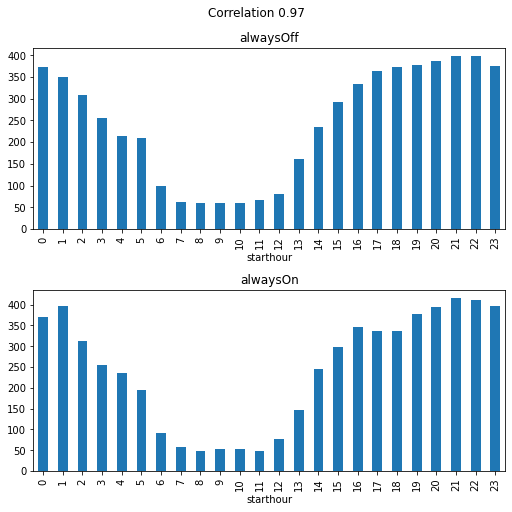

In [10]:
# check that we have same data for 
hour_count = triplogs.groupby('tspmode')['starthour'].value_counts()
corr = spearmanr(hour_count['alwaysOff'].sort_index().values, hour_count['alwaysOn'].sort_index().values, ).correlation

fig, ax = plt.subplots(2, 1,figsize=(7,7), constrained_layout=True)
fig.suptitle(f'Correlation {corr:.2f}')
hour_count['alwaysOff'].sort_index().plot.bar(ax=ax[0])
ax[0].set_title('alwaysOff')
hour_count['alwaysOn'].sort_index().plot.bar(ax=ax[1])
ax[1].set_title('alwaysOn')
plt.show()

# Hypothesising

In [11]:
# mann-whitney u-test
def mannwhitney(triplogs_on, triplogs_off):
    rejected = []
    for idx in triplogs_on.index:
        if idx in triplogs_off.index:
            pval = stats.mannwhitneyu(triplogs_on[idx], triplogs_off[idx], alternative='less').pvalue
            if pval < 0.05:
#                 print(idx, f'route is significally faster with pval {pval:.2f}')
                rejected.append(
                    (pval, idx)
                )
    print(len(rejected), 'of', len(triplogs_on.index), 'rejected', len(rejected)/len(triplogs_on.index))
    return rejected

In [12]:
# student two samples t-test
def student(triplogs_on, triplogs_off):
    rejected = []
    for idx in triplogs_on.index:
        if idx in triplogs_off.index:   
            pval = stats.ttest_ind(triplogs_on[idx], triplogs_off[idx], alternative='less').pvalue
            if pval < 0.05:
                # check same variance assumption (timings of two type of routes must have variance close to each other)
                s1 = np.sqrt(np.var(triplogs_on[idx], ddof=1))
                s2 = np.sqrt(np.var(triplogs_off[idx], ddof=1))
                valid = 'test valid'
                if np.abs(s1 - s2) > 50:
                    valid = 'test invalid'
#                 print(f'{idx} route is significally faster, {valid}, s1 {s1:.2f}, s2 {s2:.2f}')
                rejected.append(
                    (pval, idx)
                )
    print(len(rejected), 'of', len(triplogs_on.index), 'rejected', len(rejected)/len(triplogs_on.index))
    return rejected

In [13]:
def bayes_anova(a, b, route):
    data = [a, b]
    with pm.Model() as anova:
        lam = pm.Exponential('lam', lam=1/10)
        m0 = pm.Deterministic('m0', 1/lam)
        
        alphas = [0]*2
        alphas[1] = pm.Normal('alpha_1', mu=0., sigma=1000)
#         alphas[0] = pm.Normal('alpha_0', mu=0., sigma=1000)
#         alphas[0] = pm.Deterministic('alpha_0', np.array([0]))

        trips = [0]*2
        for i in range(2):
            trips[i] = pm.Exponential(f'trip_{i}', lam=1 / (1/lam + alphas[i]), observed=data[i])

        adiff = pm.Deterministic('adiff', alphas[1]-alphas[0])

        posterior = pm.sample(draws=1000, tune=3000, random_seed=42, chains=1, progressbar=False)
#     print(az.summary(posterior, ))
        
    q1 = np.quantile(posterior['adiff'], 0.025)
    q2 = np.quantile(posterior['adiff'], 0.975)
    if (q1 > 0) and (q2 > 0):
        return 1, q1, q2
    else:
        return 0, q1, q2

In [14]:
def plot_trips(triplogs_on, triplogs_off, rejected_idxs):
    fig, ax = plt.subplots(len(rejected_idxs), 1,figsize=(15,15), constrained_layout=True)
    for i, (pval, idx)  in enumerate(rejected_idxs):
        title = f'{", ".join(map(str, idx))}, pval {pval:.2f}'
        ax[i].set_title(title)
        ax[i].plot(triplogs_on[idx], label='on')
        ax[i].plot(triplogs_off[idx], label='off')
        ax[i].legend()

In [15]:
def make_df(rejected_idxs, groupby):
    df = [list(x)+[pval] for pval,x in rejected_idxs]
    df = pd.DataFrame(df)
    df.columns = groupby + ['pval']
    df = df.sort_values('pval')
    return df.reset_index(drop=True)

# Whole trips 

In [15]:
# groupby 
groupby = ['routename', 'direction']
# groupby = ['routename', 'direction', 'starthour']

triplogs_on = triplogs_clean[triplogs_clean.tspmode == 'alwaysOn'].groupby(groupby)['duration'].apply(list)

triplogs_off = triplogs_clean[triplogs_clean.tspmode == 'alwaysOff'].groupby(groupby)['duration'].apply(list)

# drop less that 3 obserationa
triplogs_off_idx = triplogs_off.apply(lambda x: len(x) > 3)
triplogs_off = triplogs_off[triplogs_off_idx]
print(triplogs_off.shape)

triplogs_on_idx = triplogs_on.apply(lambda x: len(x) > 3)
triplogs_on = triplogs_on[triplogs_on_idx]
print(triplogs_on.shape)

(64,)
(42,)


2 of 42 rejected 0.047619047619047616


,routename,direction,pval
0,43,inbound,0.002600
1,9R,outbound,0.041045


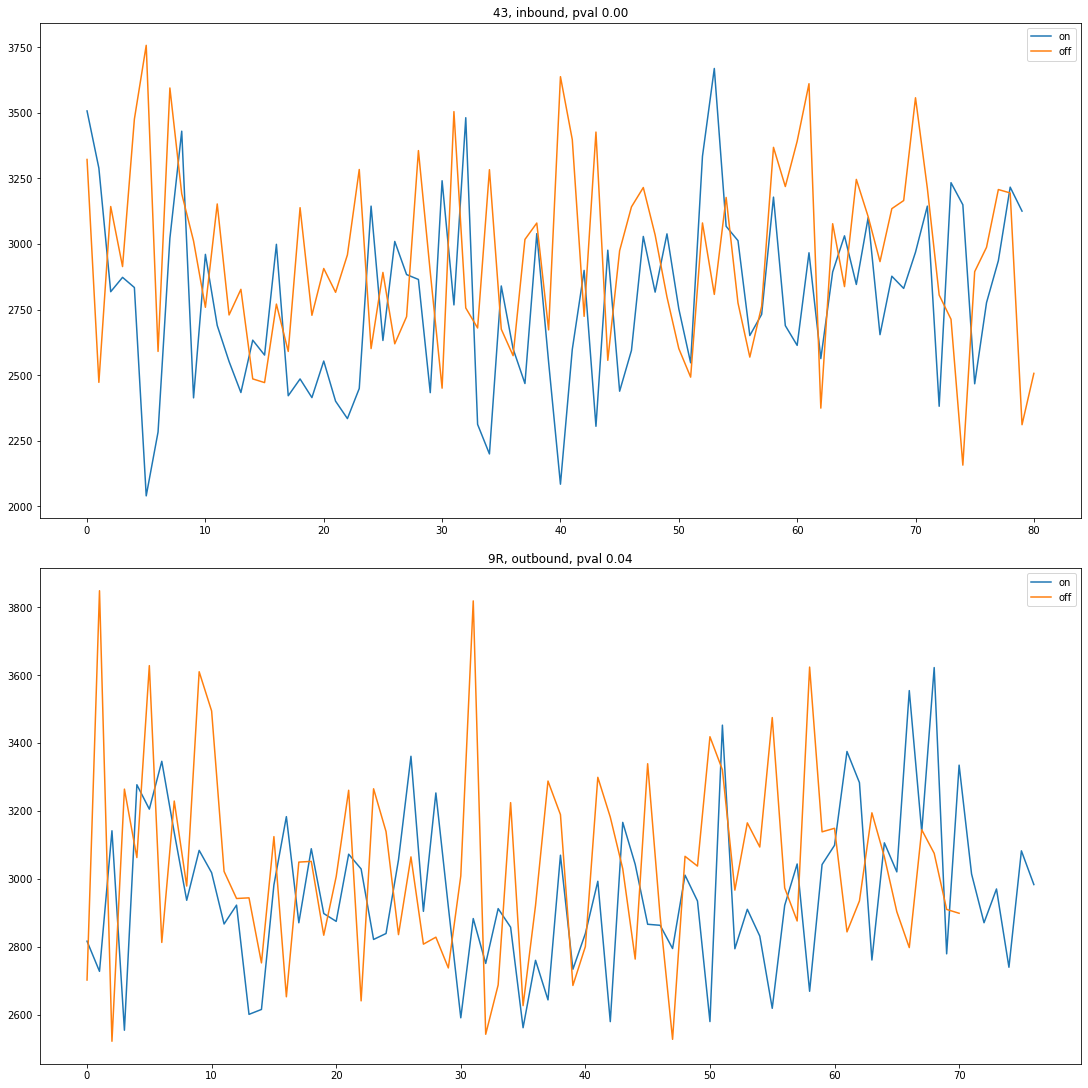

In [16]:
# mann-whitney
rejected_idxs = mannwhitney(triplogs_on, triplogs_off)
plot_trips(triplogs_on, triplogs_off, rejected_idxs)
make_df(rejected_idxs, groupby)

3 of 42 rejected 0.07142857142857142


,routename,direction,pval
0,43,inbound,0.001564
1,43,outbound,0.019313
2,9R,outbound,0.028103


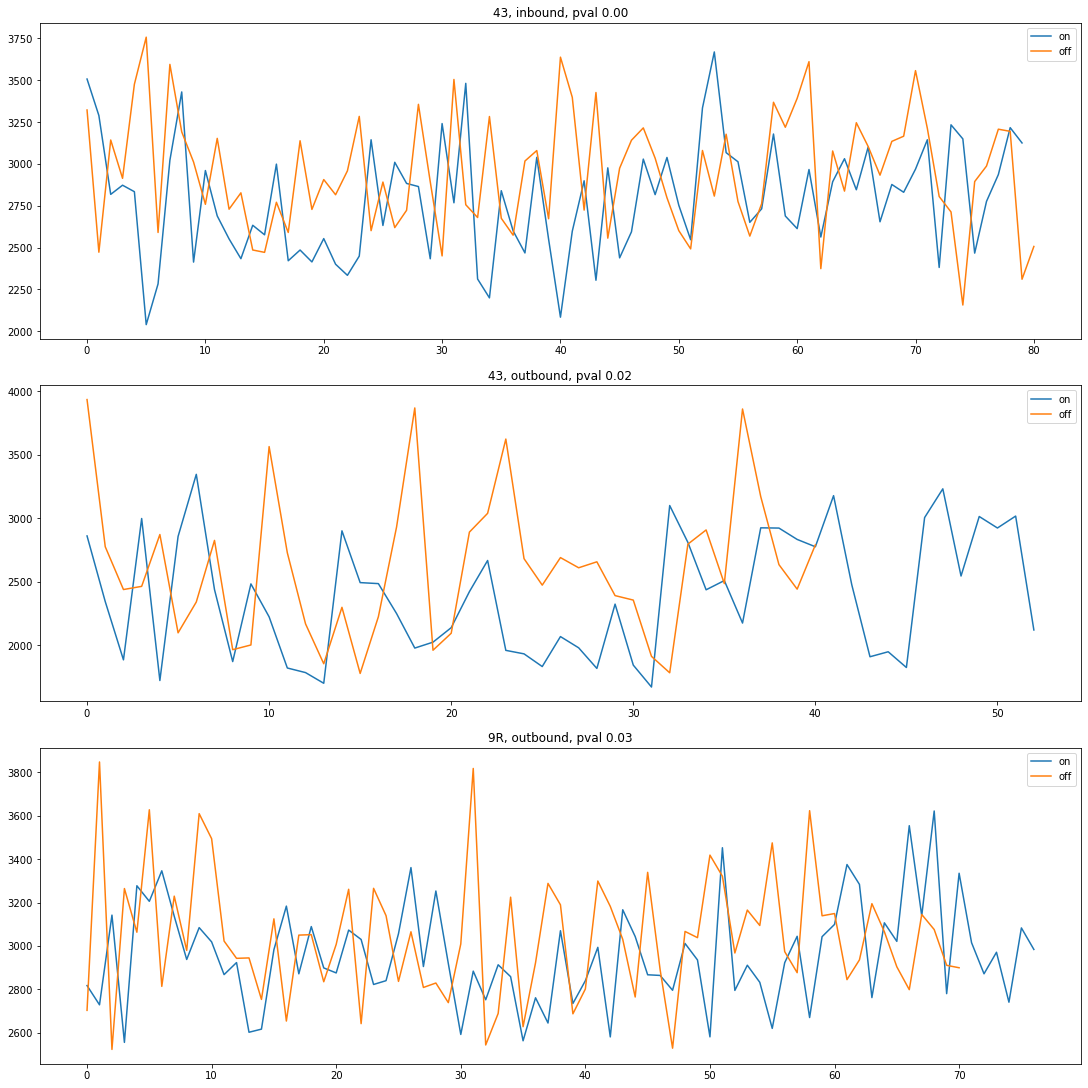

In [17]:
# student
rejected_idxs = student(triplogs_on, triplogs_off)
plot_trips(triplogs_on, triplogs_off, rejected_idxs)
make_df(rejected_idxs, groupby)

In [18]:
rejected = []
for idx in triplogs_on.index:
    print(idx, end='\r')
    if idx in triplogs_off.index:   
        res = bayes_anova(triplogs_on[idx], triplogs_off[idx], idx)
        if res[0] == 1:
            rejected.append((idx, res[1], res[2]))
            print(f'{idx} route is significally faster, {res[1]}, {res[2]}')
print(len(rejected), 'of', len(triplogs_on.index), 'rejected', len(rejected)/len(triplogs_on.index))

0 of 42 rejected 0.0


# Hourly grouped trips

In [16]:
# groupby 
# groupby 
# groupby = ['routename', 'direction']
groupby = ['routename', 'direction', 'starthour']

triplogs_on = triplogs_clean[triplogs_clean.tspmode == 'alwaysOn'].groupby(groupby)['duration'].apply(list)

triplogs_off = triplogs_clean[triplogs_clean.tspmode == 'alwaysOff'].groupby(groupby)['duration'].apply(list)

# drop less that 3 obserationa
triplogs_off_idx = triplogs_off.apply(lambda x: len(x) > 3)
triplogs_off = triplogs_off[triplogs_off_idx]
print(triplogs_off.shape)

triplogs_on_idx = triplogs_on.apply(lambda x: len(x) > 3)
triplogs_on = triplogs_on[triplogs_on_idx]
print(triplogs_on.shape)

(437,)
(257,)


In [17]:
# mann-whitney
rejected_idxs = mannwhitney(triplogs_on, triplogs_off)
# plot_trips(triplogs_on, triplogs_off, rejected_idxs)
make_df(rejected_idxs, groupby).starthour.value_counts()

12 of 257 rejected 0.04669260700389105


0     2
19    2
21    2
18    2
2     1
4     1
23    1
16    1
Name: starthour, dtype: int64

In [18]:
make_df(rejected_idxs, groupby)

,routename,direction,starthour,pval
0,38,outbound,0,0.007604
1,JBUS,outbound,2,0.008679
2,54,inbound,0,0.008836
3,9R,outbound,21,0.009208
4,9,outbound,4,0.012591
5,NBUS,inbound,19,0.012591
6,30,inbound,23,0.018668
7,38,inbound,18,0.028760
8,9R,outbound,18,0.030301
9,9,outbound,21,0.033639


In [19]:
# student two samples t-test
rejected_idxs = student(triplogs_on, triplogs_off)
# plot_trips(triplogs_on, triplogs_off, rejected_idxs)
make_df(rejected_idxs, groupby).starthour.value_counts()

13 of 257 rejected 0.05058365758754864


0     2
19    2
21    2
18    2
2     1
4     1
22    1
20    1
16    1
Name: starthour, dtype: int64

In [20]:
make_df(rejected_idxs, groupby)

,routename,direction,starthour,pval
0,54,inbound,0,0.003423
1,JBUS,outbound,2,0.003836
2,9R,outbound,21,0.007365
3,38,inbound,18,0.009961
4,9,outbound,4,0.011947
5,NBUS,inbound,19,0.012124
6,9,inbound,19,0.017152
7,38,outbound,0,0.019253
8,9R,outbound,18,0.023316
9,9,outbound,21,0.024483


In [22]:
rejected = []
for idx in triplogs_on.index:
    print(idx, end='\r')
    if idx in triplogs_off.index:
        res = bayes_anova(triplogs_on[idx], triplogs_off[idx], idx)
        if res[0] == 1:
            rejected.append((idx, res[1], res[2]))
            print(f'{idx} route is significally faster, {res[1]}, {res[2]}')
print(len(rejected), 'of', len(triplogs_on.index), 'rejected', len(rejected)/len(triplogs_on.index))

0 of 257 rejected 0.03))
